# PyMaceuticals Challenge


### Set Up & Merge Datasets

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df= pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)


In [95]:
# Display first five results
mouse_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [96]:
# Display first five records
study_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [97]:
# Combine the data into a single dataset.  
mouse_metadata_df = pd.merge(mouse_df, study_df, how="outer", on=["Mouse ID", "Mouse ID"]) 

# Display first five records 
mouse_metadata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Clean Data

In [98]:
# Checking the number of mice.
number_mice = mouse_metadata_df['Mouse ID'].nunique() 

print(f'Number of mice: {number_mice}') 

Number of mice: 249


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID AND Timepoint.
df = mouse_metadata_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], ignore_index=True)

# Confirm duplicates were dropped 
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Verify dataframe is clean

# Number of rows original merged dataframe
original_merged_df = mouse_metadata_df.shape[0]

# Number of rows of cleaned dataframe 
cleaned_df = len(df)

print(f'Prior to cleaning the data we had {original_merged_df} rows of data.')  
print(f'After we dropped duplicates, our clean dataset shows {cleaned_df} rows of data.') 

Prior to cleaning the data we had 1893 rows of data.
After we dropped duplicates, our clean dataset shows 1888 rows of data.


## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drugs = df.groupby("Drug Regimen")

# Find Mean, Median, Variance, std and Sem
summary_stats = grouped_drugs.agg({"Tumor Volume (mm3)": ['mean','median', 'var', 'std', 'sem']}) 

summary_stats.head() 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

### Create two bar plots showing the total number of measurements taken for each treatment regimen 
* Use both Pandas and Matplotlib to create your graphs 

<AxesSubplot:xlabel='Drug Regimen'>

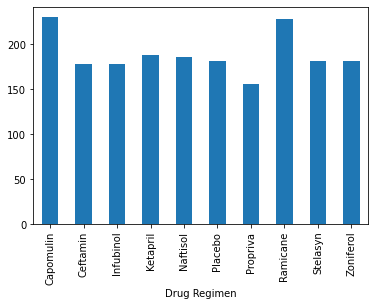

In [102]:
# Method 1: Plot using Pandas
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurements = df.groupby("Drug Regimen").count()["Mouse ID"] 

total_measurements.plot(kind="bar") 

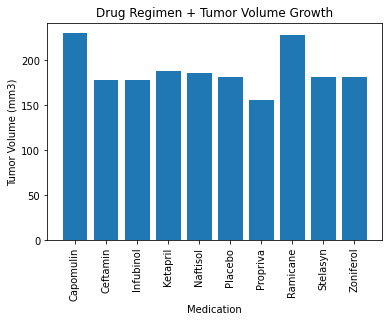

In [103]:
# Method 2: Plot using Matplotlib 
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(total_measurements.index.values, total_measurements.values)

# Give our chart some labels and a tile
plt.title("Drug Regimen + Tumor Volume Growth")
plt.xlabel("Medication")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=90)
plt.show() 

<AxesSubplot:ylabel='Mouse ID'>

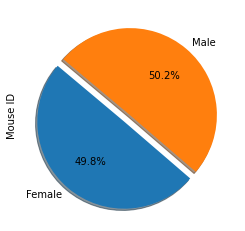

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = df.groupby("Sex").nunique()["Mouse ID"]
explode = (0.1, 0)

gender_distribution.plot(kind="pie", shadow=True, explode=explode, startangle=140, autopct="%1.1f%%") 


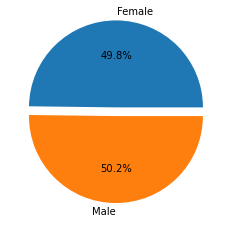

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0)
autopct =("%1.1f%%") 


plt.pie(gender_distribution.values, labels=gender_distribution.index.values, explode=explode, autopct=autopct)
plt.show() 




## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the treatment regimens: 
* Capomulin
* Ramicane
* Infubinol
* Ceftamin

### Instructions:
* Start by getting the last (greatest) timepoint for each mouse
* Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [108]:
# Step 1: Use .last() function to determine last Timepoint
tumor_volumes = df.groupby("Mouse ID").last()[["Tumor Volume (mm3)","Drug Regimen", "Timepoint"]]  

tumor_volumes

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
a203,67.973419,Infubinol,45
a251,65.525743,Infubinol,45
a262,70.717621,Placebo,45
a275,62.999356,Ceftamin,45
a366,63.440686,Stelasyn,30
...,...,...,...
z435,48.710661,Propriva,10
z578,30.638696,Ramicane,45
z581,62.754451,Infubinol,45


In [109]:
# Step 2: Create a Boolean Mask to separate each drug 
capomulin_subset = tumor_volumes["Drug Regimen"].isin(['Capomulin']) 
ramicane_subset = tumor_volumes["Drug Regimen"].isin(['Ramicane']) 
infubinol_subset = tumor_volumes["Drug Regimen"].isin(['Infubinol']) 
ceftamin_subset = tumor_volumes["Drug Regimen"].isin(['Ceftamin']) 

# Step 3: Calculate final tumor volume for each drug
capomulin_tumor_results = tumor_volumes.loc[capomulin_subset, :]
ramicane_tumor_results = tumor_volumes.loc[ramicane_subset, :]
infubinol_tumor_results = tumor_volumes.loc[infubinol_subset, :]
ceftamin_tumor_results = tumor_volumes.loc[ceftamin_subset, :]


In [110]:
# Tumor Volume Results - capomulin
display(capomulin_tumor_results) 

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
b128,38.982878,Capomulin,45
b742,38.939633,Capomulin,45
f966,30.485985,Capomulin,20
g288,37.074024,Capomulin,45
g316,40.159220,Capomulin,45
i557,47.685963,Capomulin,45
i738,37.311846,Capomulin,45
j119,38.125164,Capomulin,45
j246,38.753265,Capomulin,35


In [111]:
# Tumor Volume Results - Ramicane
display(ramicane_tumor_results) 

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
a411,38.407618,Ramicane,45
a444,43.047543,Ramicane,45
a520,38.810366,Ramicane,45
a644,32.978522,Ramicane,45
c458,38.342008,Ramicane,30
c758,33.397653,Ramicane,45
d251,37.311236,Ramicane,45
e662,40.659006,Ramicane,45
g791,29.128472,Ramicane,45


In [112]:
# Tumor Volume Results - infubinol
display(infubinol_tumor_results) 

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
a203,67.973419,Infubinol,45
a251,65.525743,Infubinol,45
a577,57.031862,Infubinol,30
a685,66.083066,Infubinol,45
c139,72.226731,Infubinol,45
c326,36.321346,Infubinol,5
c895,60.969711,Infubinol,30
e476,62.435404,Infubinol,45
f345,60.918767,Infubinol,45


In [114]:
# Tumor Volume Results - ceftamin
display(ceftamin_tumor_results)

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
a275,62.999356,Ceftamin,45
b447,45.000000,Ceftamin,0
b487,56.057749,Ceftamin,25
b759,55.742829,Ceftamin,30
f436,48.722078,Ceftamin,15
h531,47.784682,Ceftamin,5
j296,61.849023,Ceftamin,45
k210,68.923185,Ceftamin,45
l471,67.748662,Ceftamin,45


### Calculate the IQR and quantitatively determine if there are any potential outliers.

In [115]:
# Step 1: Potential Outliets --> use mean, median or mode? 

print(f'To look at potential outliers, examine mode, mean and median.') 

print(f'Tumor Volume (mm3) values are continuous so mode is not appropriate.')

print(f'To determine whether mean or median is more approprate, create a histogram') 

To look at potential outliers, examine mode, mean and median.
Tumor Volume (mm3) values are continuous so mode is not appropriate.
To determine whether mean or median is more approprate, create a histogram


The Histogram shows that data is not normally distributed so median is a more interpretable statistic.


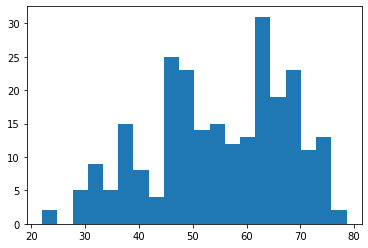

In [120]:
# Step 2: Create a histogram
plt.hist(tumor_volumes["Tumor Volume (mm3)"],bins=20) 

st.normaltest(tumor_volumes["Tumor Volume (mm3)"]) 

print(f'The Histogram shows that data is not normally distributed so median is a more interpretable statistic.')

In [119]:
# Determine if there are any potential outliers using upper and lower bounds
    # METHOD 1
    # Step 1: Determine first quartile and third quartile cutoff
    # Step 2: Determine difference between first quartile and third quartile cutoff to get interquartile range
    # Step 3: Multipy 1.5x interquartile range to 3rd quartile to get top cutoff for outliers 
    # Step 4: Multiply 1.5x interquartile range to 1st quartile for bottom cutoff

    
# quartiles = tumor_volumes['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# quartiles = tumor_volumes['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# quartiles

#lowerq = np.percentile(tumor_volumes, 25, interpolation="midpoint")
#upperq = np.percentile(tumor_volumes, 75, interpolation="midpoint")
#iqr = upperq-lowerq

# print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
# print(f"The upper quartile of Tumor Volume (mm3)is: {upperq}")
# print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
# print(f"The the median Tumor Volume (mm3) is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


In [ ]:
# Determine if there are any potential outliers using upper and lower bounds

# If the data is in a dataframe, we use pandas to give quartile calculations

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# Add subset 
    
    
# Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers.



In [78]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Ceftamin = final_volumes.loc[final_volumes["Drug Regimen"] == ("Ceftamin")] 
# plt.boxplot(Ceftamin["Tumor Volume (mm3)"])

# Infubinol = final_volumes.loc[final_volumes["Drug Regimen"] == ("Infubinol")] 

# Ramicane = final_volumes.loc[final_volumes["Drug Regimen"] == ("Ramicane")] 

# Capomulin = final_volumes.loc[final_volumes["Drug Regimen"] == ("Capomulin")]  


# plt.boxplot((Ceftamin["Tumor Volume (mm3)"], (Infubinol["Tumor Volume (mm3)"]), (Ramicane["Tumor Volume (mm3)"]), (Capomulin["Tumor Volume (mm3)"]))

SyntaxError: unexpected EOF while parsing (<ipython-input-78-0567c7138b68>, line 12)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#list comprehension to get a random mouse ID from all the mice on the Capomulin regimen

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# # Create empty list to fill with tumor vol data (for plotting)
# tumor_volume = []
# drugs =[] 

# for drug in drugs:
#     filter_df = final_volumes.loc[final_volumes["Drug Regimen"]==drug]  
    
# filter_df.head() 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
